In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [57]:
# Load your dataset
df = pd.read_csv("/content/undersampled_data.csv")  # Adjust the path in Colab if needed
df.head()


,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.0,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.0,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.0,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.0,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.0,5499.0,No


In [58]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1744, 13)


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           1744 non-null   float64
 1   Card           1744 non-null   float64
 2   Year           1744 non-null   float64
 3   Month          1744 non-null   float64
 4   Day            1744 non-null   float64
 5   Amount         1744 non-null   object 
 6   UseChip        1744 non-null   object 
 7   MerchantName   1744 non-null   object 
 8   MerchantCity   1744 non-null   object 
 9   MerchantState  1744 non-null   object 
 10  Zip            1744 non-null   float64
 11  MCC            1744 non-null   float64
 12  target         1744 non-null   object 
dtypes: float64(7), object(6)
memory usage: 177.3+ KB
None


In [60]:
print(df.describe())

              User         Card         Year        Month          Day  \
count  1744.000000  1744.000000  1744.000000  1744.000000  1744.000000   
mean   1031.327408     1.639908  2012.118119     6.318807    16.022362   
std     573.230246     1.604973     4.900833     3.552148     8.643581   
min       2.000000     0.000000  1991.000000     1.000000     1.000000   
25%     544.000000     0.000000  2009.000000     3.000000     9.000000   
50%    1058.000000     1.000000  2012.000000     6.000000    16.000000   
75%    1514.000000     3.000000  2016.000000     9.000000    24.000000   
max    1999.000000     8.000000  2020.000000    12.000000    31.000000   

                Zip          MCC  
count   1744.000000  1744.000000  
mean   52227.300720  5480.039564  
std    22009.391840   833.166602  
min     1266.000000  1711.000000  
25%    45822.000000  5300.000000  
50%    51694.676895  5411.000000  
75%    55402.500000  5812.000000  
max    99508.000000  9402.000000  


In [61]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [62]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           1744 non-null   float64
 1   Card           1744 non-null   float64
 2   Year           1744 non-null   float64
 3   Month          1744 non-null   float64
 4   Day            1744 non-null   float64
 5   Amount         1744 non-null   float64
 6   UseChip        1744 non-null   object 
 7   MerchantName   1744 non-null   object 
 8   MerchantCity   1744 non-null   object 
 9   MerchantState  1744 non-null   object 
 10  Zip            1744 non-null   float64
 11  MCC            1744 non-null   float64
 12  target         1744 non-null   object 
dtypes: float64(8), object(5)
memory usage: 177.3+ KB
None
User             0
Card             0
Year             0
Month            0
Day              0
Amount           0
UseChip          0
MerchantName     0
MerchantCity     0
Mer

In [63]:
print("Class distribution:\n", df['target'].value_counts())

Class distribution:
 target
No     872
Yes    872
Name: count, dtype: int64


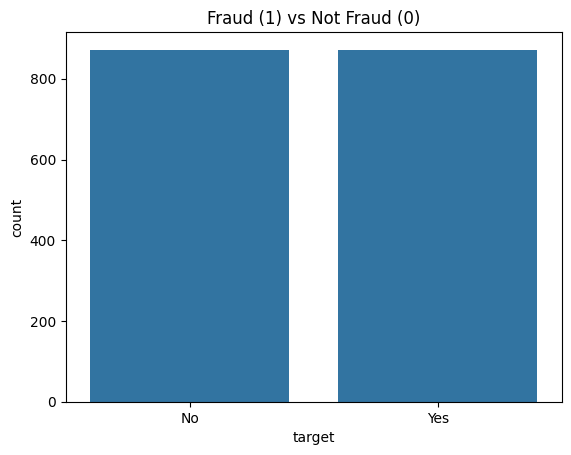

In [64]:
sns.countplot(x='target', data=df)
plt.title("Fraud (1) vs Not Fraud (0)")
plt.show()

In [65]:
drop_cols = ['User', 'Card', 'MerchantName', 'MerchantCity', 'MerchantState']
X = df.drop(columns=drop_cols + ['target'])
y = df['target']


In [66]:
le = LabelEncoder()
X['UseChip'] = le.fit_transform(X['UseChip'].astype(str))
X['MCC'] = le.fit_transform(X['MCC'].astype(str))

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5787965616045845

Confusion Matrix:
 [[111  66]
 [ 81  91]]

Classification Report:
               precision    recall  f1-score   support

          No       0.58      0.63      0.60       177
         Yes       0.58      0.53      0.55       172

    accuracy                           0.58       349
   macro avg       0.58      0.58      0.58       349
weighted avg       0.58      0.58      0.58       349



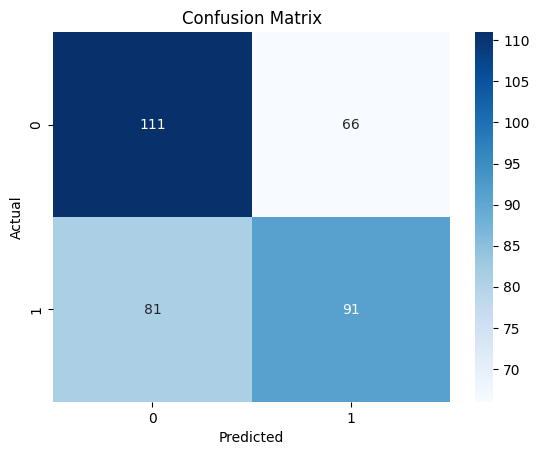

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [81]:
print(" Model successfully built to detect credit card fraud using Logistic Regression!")


 Model successfully built to detect credit card fraud using Logistic Regression!


In [82]:
sample_data = {
    'Year': [2023],
    'Month': [6],
    'Day': [15],
    'Amount': [120.50],         # transaction amount
    'UseChip': ['Swipe Transaction'],  # or 'Chip Transaction'
    'Zip': [12345],
    'MCC': ['5999']             # merchant category code
}


In [83]:
sample_df = pd.DataFrame(sample_data)

In [85]:
sample_df['UseChip'] = le.fit_transform(sample_df['UseChip'].astype(str))
sample_df['MCC'] = le.fit_transform(sample_df['MCC'].astype(str))

In [86]:
sample_scaled = scaler.transform(sample_df)

In [87]:
prediction = model.predict(sample_scaled)

In [88]:
if prediction[0] == 1:
    print(" The transaction is predicted to be **FRAUDULENT**.")
else:
    print("The transaction is predicted to be **LEGITIMATE**.")

The transaction is predicted to be **LEGITIMATE**.
